In [4]:
import warnings
warnings.filterwarnings('ignore')

import gym
import gym_bandits
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

In [5]:
env = gym.make('BanditTenArmedGaussian-v0')
observation = env.reset()

numActions = 10
probActions = np.full(numActions, 1/numActions)
valueActions = np.random.randn(numActions)
freqActions = np.zeros(numActions)


Best Action is 3 with an average reward of 2.2188072424535115


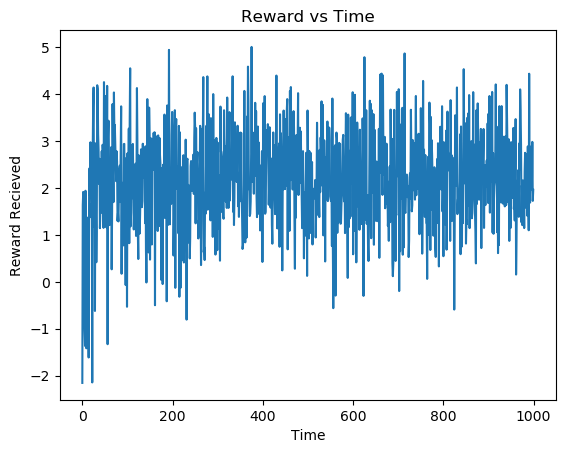

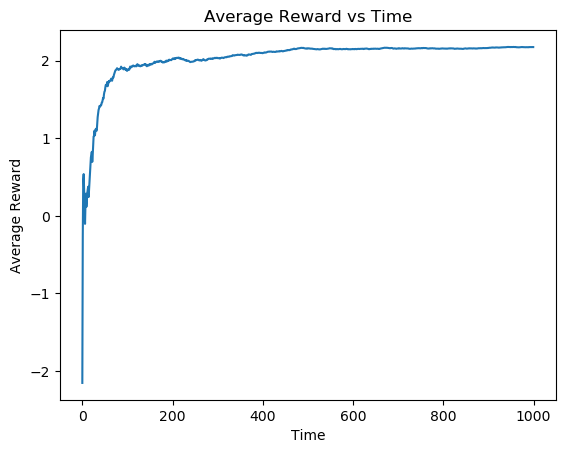

In [6]:
EPISODES = 1000
STEP_SIZE = 0.05

rewards = np.zeros(EPISODES)
avgReward = np.zeros(EPISODES)

for episode in range(EPISODES):
    randNum = np.random.random()
    cumProbs = np.cumsum(probActions)
    action = len(cumProbs[cumProbs < randNum])
    observation, reward, done, info = env.step(action)
    rewards[episode] = reward
    avgReward[episode] = (np.sum(rewards) / (episode + 1))
    
    freqActions[action] += 1
    valueActions[action] = valueActions[action] + 1/freqActions[action]*(reward - valueActions[action])
    maxAction = np.argmax(valueActions)
    
    for _action in range(numActions):
        if(_action == maxAction):
            probActions[_action] = probActions[_action] + STEP_SIZE*(1 - probActions[_action])
        else:
            probActions[_action] = probActions[_action] + STEP_SIZE*(0 - probActions[_action])


print(f"Best Action is {np.argmax(probActions)} with an average reward of {valueActions[np.argmax(probActions)]}")

plt.plot(range(EPISODES), rewards)
plt.xlabel("Time")
plt.ylabel("Reward Recieved")
plt.title("Reward vs Time")
plt.show()

plt.plot(range(EPISODES), avgReward)
plt.xlabel("Time")
plt.ylabel("Average Reward")
plt.title("Average Reward vs Time")
plt.show()

    